In [2]:
import telegram
from apscheduler.schedulers.blocking import BlockingScheduler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

In [3]:
client = Client(api_key='',
                api_secret='')

In [3]:
token = ""
bot = telegram.Bot(token=token)
chat_id = ''
bot.send_message(text='1', chat_id=chat_id)

In [6]:
# L = client.futures_ticker(interval=Client.KLINE_INTERVAL_1MINUTE)
# L

In [4]:
L = client.futures_ticker(interval=Client.KLINE_INTERVAL_1MINUTE)
P = []
for l in L:
    df_pair = pd.Series(l).to_frame().T
    P.append(df_pair)
df = pd.concat(P)
print(df.columns)

cols=[i for i in df.columns if i not in ["symbol"]]
for col in cols:
    df[col]=pd.to_numeric(df[col])

df_p =  df.sort_values('priceChangePercent', ascending=False)
# df_p =  df.sort_values('count', ascending=False)
variables = ['symbol', 'priceChangePercent', 'weightedAvgPrice', 'lastPrice', 'openPrice', 'highPrice', 'lowPrice', 'volume', 'firstId', 'lastId', 'count']
df_p = df_p[variables]
df_p

Index(['symbol', 'priceChange', 'priceChangePercent', 'weightedAvgPrice',
       'lastPrice', 'lastQty', 'openPrice', 'highPrice', 'lowPrice', 'volume',
       'quoteVolume', 'openTime', 'closeTime', 'firstId', 'lastId', 'count'],
      dtype='object')


,symbol,priceChangePercent,weightedAvgPrice,lastPrice,openPrice,highPrice,lowPrice,volume,firstId,lastId,count
0,DASHUSDT,21.107,136.77000,140.46000,115.98000,175.2000,109.42000,3.444856e+06,62575459,63486614,910629
0,YFIIUSDT,5.801,2520.70000,2619.20000,2475.60000,2655.2000,2404.50000,2.953890e+04,57164290,57401053,236746
0,BTCUSDT_210625,4.848,34336.70000,34489.50000,32894.90000,35582.2000,32833.60000,2.806462e+03,2486423,2511983,25561
0,BTCDOMUSDT,1.794,1130.50000,1134.90000,1114.90000,1142.0000,1110.90000,4.999233e+03,737850,755105,17253
0,ETHUSDT_210625,1.297,1984.13000,1946.80000,1921.88000,2036.0300,1916.23000,3.022361e+04,2743032,2784075,41044
...,...,...,...,...,...,...,...,...,...,...,...
0,GTCUSDT,-11.668,5.35700,5.14800,5.82800,5.8830,4.97400,5.247654e+06,4293198,4399904,106705
0,ALICEUSDT,-12.953,5.09600,4.87900,5.60500,5.6540,4.71000,2.620048e+07,42348990,42726276,377132
0,CELRUSDT,-14.684,0.02393,0.02266,0.02656,0.0266,0.02206,1.149734e+09,14983159,15077526,94367
0,CHRUSDT,-15.795,0.25060,0.23030,0.27350,0.2750,0.22260,1.863062e+09,27962734,29142481,1179701


In [124]:
c = df_p[df_p['symbol']=='AXSUSDT']['count'][0]
c

2182129

In [122]:
v = df_p[df_p['symbol']=='AXSUSDT']['volume'][0]
qv = df_p[df_p['symbol']=='AXSUSDT']['quoteVolume'][0]
p = df_p[df_p['symbol']=='AXSUSDT']['lastPrice'][0]
c = df_p[df_p['symbol']=='AXSUSDT']['count'][0]
c

2177294

In [121]:
v, qv, p*v

(97733230.0, 1262983168.24, 1390548396.44)

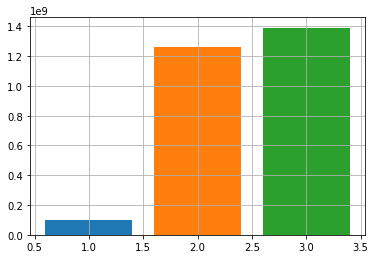

In [120]:
plt.bar(1, v)# , color='green')
plt.bar(2, qv)# , color='orange')
plt.bar(3, p*v)# , color='orange')
# plt.legend(['buy', 'sell'])
plt.grid()
plt.show()

In [56]:
list(df_p.columns)

['symbol',
 'priceChange',
 'priceChangePercent',
 'weightedAvgPrice',
 'lastPrice',
 'lastQty',
 'openPrice',
 'highPrice',
 'lowPrice',
 'volume',
 'quoteVolume',
 'openTime',
 'closeTime',
 'firstId',
 'lastId',
 'count']

In [127]:
e=['symbol', 
 'priceChangePercent', 
 'weightedAvgPrice', 
 'lastPrice', 
 'openPrice', 
 'highPrice', 
 'lowPrice', 
 'volume', 
 'firstId',
 'lastId',
 'count']
print(e)

['symbol', 'priceChangePercent', 'weightedAvgPrice', 'lastPrice', 'openPrice', 'highPrice', 'lowPrice', 'volume', 'firstId', 'lastId', 'count']


In [53]:
df_p.head()

,symbol,priceChange,priceChangePercent,weightedAvgPrice,lastPrice,lastQty,openPrice,highPrice,lowPrice,volume,quoteVolume,openTime,closeTime,firstId,lastId,count
0,SNXUSDT,1.75600,17.532,10.79100,11.77200,4.3,10.0160,12.1000,9.17200,2.179893e+07,2.352312e+08,1625764740000,1625851160651,54729970,55438055,708085
0,AKROUSDT,0.00291,16.257,0.01945,0.02081,282.0,0.0179,0.0210,0.01719,2.291178e+09,4.457341e+07,1625764740000,1625851160693,26121092,26305601,184493
0,AXSUSDT,1.98300,16.243,12.88449,14.19100,9.0,12.2080,15.1000,11.22500,9.729105e+07,1.253545e+09,1625764740000,1625851160825,70476401,72639444,2163023
0,EOSUSDT,0.56100,15.404,3.91200,4.20300,13.4,3.6420,4.2930,3.45200,2.320659e+08,9.078140e+08,1625764740000,1625851160868,257949213,259291983,1342756
0,ZRXUSDT,0.09800,13.133,0.84230,0.84420,10.5,0.7462,0.9042,0.73270,1.719799e+08,1.448555e+08,1625764740000,1625851160490,45129036,45593525,464487


In [54]:
df_p.tail()

,symbol,priceChange,priceChangePercent,weightedAvgPrice,lastPrice,lastQty,openPrice,highPrice,lowPrice,volume,quoteVolume,openTime,closeTime,firstId,lastId,count
0,RUNEUSDT,-0.3550,-5.376,6.20450,6.2480,39.0,6.6030,6.7380,5.8460,16172881.0,1.003442e+08,1625764740000,1625851159527,46689811,46944285,254474
0,TOMOUSDT,-0.1375,-5.866,2.23910,2.2064,365.0,2.3439,2.3800,2.0866,71252429.0,1.595432e+08,1625764740000,1625851158676,30779706,31294749,515013
0,CTKUSDT,-0.0730,-6.716,1.02323,1.0140,5.0,1.0870,1.0960,0.9730,17548447.0,1.795613e+07,1625764740000,1625851143896,22648184,22718749,70565
0,BZRXUSDT,-0.0157,-7.326,0.19960,0.1986,489.0,0.2143,0.2184,0.1886,155309019.0,3.100036e+07,1625764740000,1625851159145,41871926,41979533,107604
0,KEEPUSDT,-0.0279,-9.094,0.28190,0.2789,4056.0,0.3068,0.3086,0.2657,85734687.0,2.417050e+07,1625764740000,1625851159880,1378773,1476116,97343


In [35]:
df_p.sort_values('count', ascending=False)['priceChangePercent'].max()

'5.748'

In [13]:
import datetime
your_timestamp = 1625762460000
date = datetime.datetime.fromtimestamp(your_timestamp / 1e3)
print(date)

2021-07-08 11:41:00


In [14]:
your_timestamp = 1625848882193
date = datetime.datetime.fromtimestamp(your_timestamp / 1e3)
print(date)

2021-07-09 11:41:22.193000


In [9]:
client.futures_ticker(interval=Client.KLINE_INTERVAL_1MINUTE)

[{'symbol': 'ETHUSDT_210924',
  'priceChange': '22.79',
  'priceChangePercent': '1.049',
  'weightedAvgPrice': '2147.07',
  'lastPrice': '2195.39',
  'lastQty': '0.001',
  'openPrice': '2172.60',
  'highPrice': '2238.05',
  'lowPrice': '2060.00',
  'volume': '43415.228',
  'quoteVolume': '93215653.29',
  'openTime': 1625762640000,
  'closeTime': 1625849052824,
  'firstId': 743559,
  'lastId': 792353,
  'count': 48794},
 {'symbol': 'BTSUSDT',
  'priceChange': '0.00094',
  'priceChangePercent': '2.288',
  'weightedAvgPrice': '0.04090',
  'lastPrice': '0.04202',
  'lastQty': '144',
  'openPrice': '0.04108',
  'highPrice': '0.04245',
  'lowPrice': '0.03994',
  'volume': '247217705',
  'quoteVolume': '10110394.75000',
  'openTime': 1625762640000,
  'closeTime': 1625849049173,
  'firstId': 15953115,
  'lastId': 16014349,
  'count': 61234},
 {'symbol': 'XTZUSDT',
  'priceChange': '0.083',
  'priceChangePercent': '3.071',
  'weightedAvgPrice': '2.675',
  'lastPrice': '2.786',
  'lastQty': '5.6

In [8]:
client.get_historical_klines?